In [1]:
import json
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_formats = ['retina']

In [2]:
y_scaler = pickle.load(open("artifacts/y_scaler.pkl", "rb"))

In [3]:
models = {
  "lstm_64": "logs/cross_val_lstm_64.json",
  "lstm_128": "logs/cross_val_lstm_128.json",
  "lstm_256": "logs/cross_val_lstm_256.json",
  "bilstm_64": "logs/cross_val_bilstm_64.json",
  "bilstm_256": "logs/cross_val_bilstm_256.json",
  "lstm2_64_32": "logs/cross_val_lstm2_64_32.json",
  "lstm2_128_64": "logs/cross_val_lstm2_128_64.json",
  "lstm2_256_128": "logs/cross_val_lstm2_256_128.json",
  "bilstm2_256_128": "logs/cross_val_bilstm2_256_128.json",
  "lstm3_256_128_64": "logs/cross_val_lstm3_256_128_64.json"
}

logs = dict()
rows = []

for name, log in models.items():
  with open(log, "r") as f:
    logs[name] = json.loads(f.read())

  for fold, losses in logs[name].items():
    rows.append((name, fold, min(losses["val_loss"])))

df = pd.DataFrame(rows, columns=["name", "fold", "loss"])

In [4]:
pd.pivot_table(df, values=["loss"], index=["name", "fold"], sort=False)

loss
name             fold            
lstm_64          fold_0  0.034440
                 fold_1  0.011757
                 fold_2  0.010480
                 fold_3  0.008981
                 fold_4  0.054813
lstm_128         fold_0  0.028436
                 fold_1  0.010080
                 fold_2  0.009462
                 fold_3  0.008662
                 fold_4  0.046015
lstm_256         fold_0  0.024972
                 fold_1  0.008101
                 fold_2  0.009639
                 fold_3  0.008734
                 fold_4  0.035841
bilstm_64        fold_0  0.086638
                 fold_1  0.013563
                 fold_2  0.011126
                 fold_3  0.014101
                 fold_4  0.069238
bilstm_256       fold_0  0.069342
                 fold_1  0.012747
                 fold_2  0.009604
                 fold_3  0.009906
                 fold_4  0.041069
lstm2_64_32      fold_0  0.073015
                 fold_1  0.021792
                 fold_2  0.010981
                 fold_3  0.010128
                 fold_4  0.084155
lstm2_128_64     fold_0  0.050338
                 fold_1  0.015184
                 fold_2  0.010693
                 fold_3  0.009447
                 fold_4  0.079833
lstm2_256_128    fold_0  0.031104
                 fold_1  0.011580
                 fold_2  0.010062
                 fold_3  0.009389
                 fold_4  0.050820
bilstm2_256_128  fold_0  0.063802
                 fold_1  0.011479
                 fold_2  0.009694
                 fold_3  0.008597
                 fold_4  0.054704
lstm3_256_128_64 fold_0  0.077350
                 fold_1  0.018987
                 fold_2  0.010499
                 fold_3  0.009837
                 fold_4  0.075900

In [5]:
pd.pivot_table(
  df,
  values=["loss"],
  index=["name"],
  aggfunc={"loss": [np.min, np.max, np.mean, np.std]},
  sort=False
)

loss                              
                      amin      amax      mean       std
name                                                    
lstm_64           0.008981  0.054813  0.024094  0.020104
lstm_128          0.008662  0.046015  0.020531  0.016466
lstm_256          0.008101  0.035841  0.017458  0.012442
bilstm_64         0.011126  0.086638  0.038933  0.036151
bilstm_256        0.009604  0.069342  0.028534  0.026349
lstm2_64_32       0.010128  0.084155  0.040014  0.035727
lstm2_128_64      0.009447  0.079833  0.033099  0.031079
lstm2_256_128     0.009389  0.050820  0.022591  0.018178
bilstm2_256_128   0.008597  0.063802  0.029655  0.027229
lstm3_256_128_64  0.009837  0.077350  0.038515  0.034980

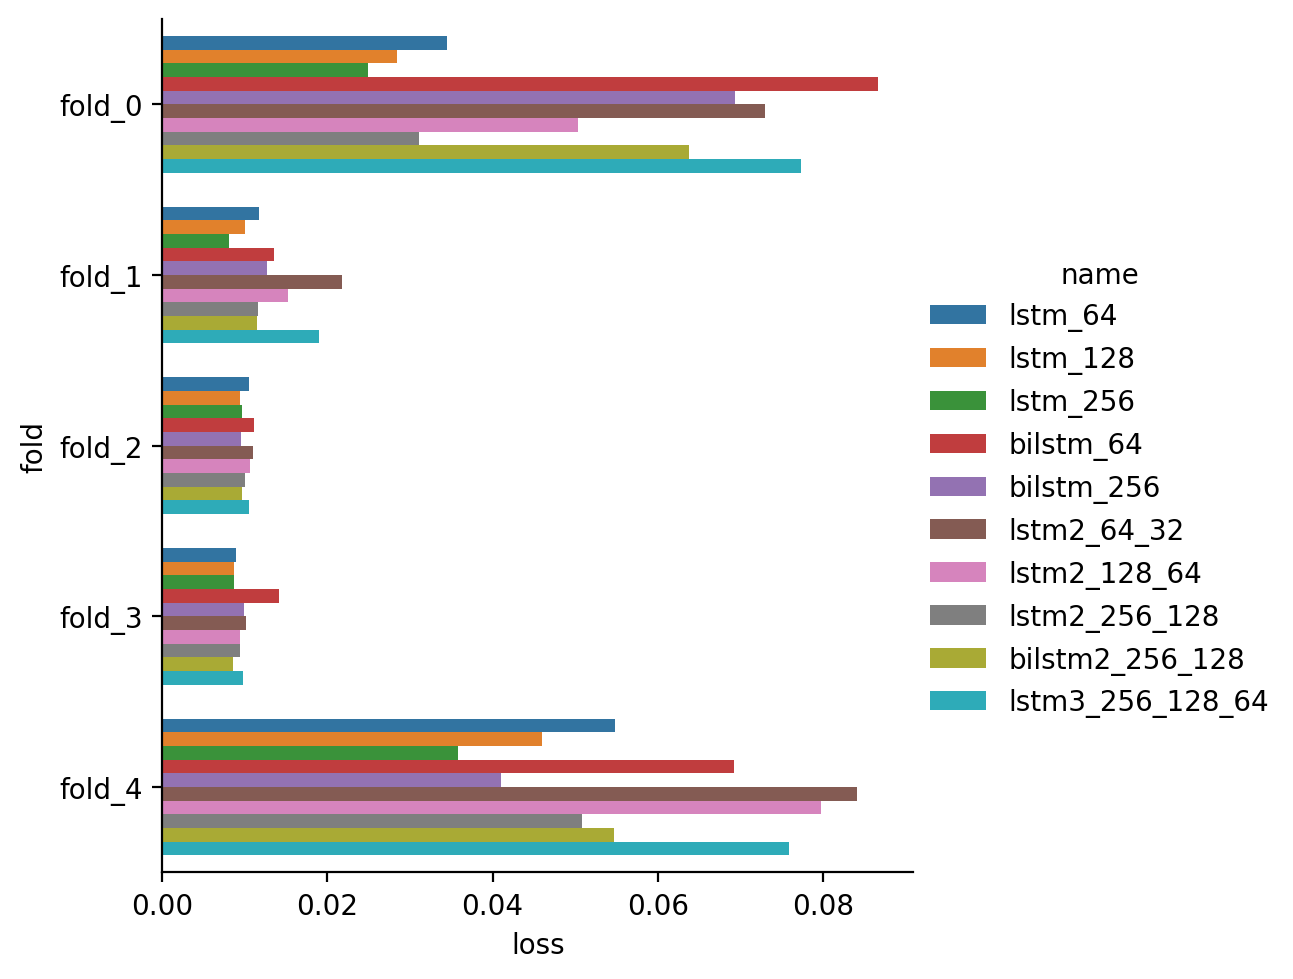

In [6]:
sns.catplot(
  data=df,
  kind="bar",
  x="loss",
  y="fold",
  hue="name",
  # height=6,
  orient="h"
)
plt.show()

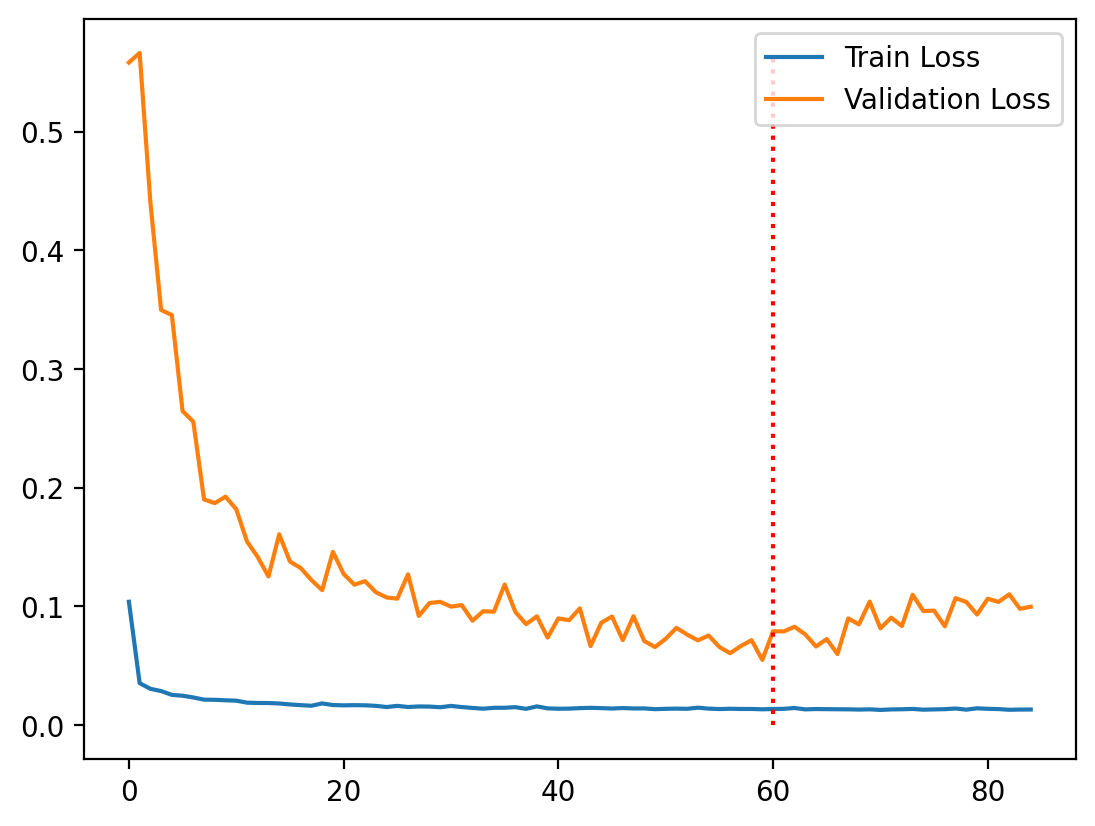

In [7]:
model_name = "lstm_64"
fold_name = "fold_4"

y1 = logs[model_name][fold_name]["loss"]
y2 = logs[model_name][fold_name]["val_loss"]

plt.plot(y1)
plt.plot(y2)

plt.vlines(len(y1) - 25, ymin=0, ymax=np.max(y1 + y2), colors="red", linestyles="dotted")
plt.legend(["Train Loss", "Validation Loss"])

plt.show()